# MAS DSE 200: Homework 3 - Matplotlib

#### Tasks:

- Introduction to Matplotlib.  
  
- Submission on Gradescope:
  - Submit this Jupyter notebook to "Homework 3"

#### Due date: Thursday, November 6, 2025, 11:59 PM

---

Remember: when in doubt, read the documentation first.

Python - https://docs.python.org/3/

NumPy - https://numpy.org/doc/stable/

pandas - https://pandas.pydata.org/docs/

matplotlib - https://matplotlib.org/stable/contents.html

seaborn - https://seaborn.pydata.org/api.html

## Instructions

* You don’t need to explain your approach (unless specified) so please be concise in your submission.
* To obtain full marks for a question, both the answer and the code should be correct.
* Completely wrong (or missing) code with correct answer will result in zero marks.

### Imports

In [2]:
%pip install pandas numpy matplotlib seaborn scikit-learn

In [3]:
import pandas as pd
import numpy as np
import random
import os
import requests
import matplotlib.pyplot as plt
import seaborn as sns

### Preliminaries

Load the cars data into a Pandas DataFrame called cars_df.

In [4]:
thePath = "./" #check the current directory/folder
theFile = 'cars.csv'
theLink = "https://dse200.dev/Day3/cars.csv"

if not os.path.exists(thePath + theFile):
    r = requests.get(theLink)
    with open(thePath + theFile, 'wb') as f:
        f.write(r.content)

#cars_df = pd.read_csv('cars.csv')

In [5]:
thePath = "./" # save to this directory
theFile = 'cars.csv' # name the file
theLink = "https://dse200.dev/Day3/cars.csv" # web location for file

# os python module for navigating directory, paths is to check a direction and exists see if it's there
if not os.path.exists(thePath + theFile): # if the file doesn't exists in this path
  r = requests.get(theLink) # define variable for reaching out to this location
  with open(thePath + theFile, 'wb') as f: # open a new file in this directory named how we wanted then then close it after moving on from the block of code (automatically). name the file as f. wb = write binary
    f.write(r.content) #take the content we got from r and write it to the file
cars_df = pd.read_csv('cars.csv')
cars_df.head(5)

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
0,140,143,202,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,True,6,6 Speed Automatic Select Shift,18,Gasoline,25,Automatic transmission,2009 Audi A3 3.2,Audi,2009 Audi A3,2009,250,236
1,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,22,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T AT,Audi,2009 Audi A3,2009,200,207
2,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Manual,21,Gasoline,30,Manual transmission,2009 Audi A3 2.0 T,Audi,2009 Audi A3,2009,200,207
3,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207
4,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207


In [6]:
len(cars_df)

5076

In [7]:
cars_df.head(1)

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
0,140,143,202,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,True,6,6 Speed Automatic Select Shift,18,Gasoline,25,Automatic transmission,2009 Audi A3 3.2,Audi,2009 Audi A3,2009,250,236


### 1. Inspect data - 1 point

1.1 What is the number of unique car identifiers (`Identification.ID`)? - 0.5 points

In [8]:
# YOUR CODE HERE
unique_ids = cars_df['Identification.ID'].nunique() #or .drop_duplicates().shape[0]
unique_ids

5030

1.2 What is the number of unique entries in the dataset when jointly looking at `Identification.ID` AND `Identification.Year`? Note that this should be greater than the value obtained before - 0.5 points

In [9]:
# YOUR CODE HERE
unique_ids_and_years = cars_df[['Identification.ID','Identification.Year']].drop_duplicates().shape[0]
unique_ids_and_years

5039

In [10]:
!pip install pandera

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.9/292.9 kB 6.3 MB/s eta 0:00:00


In [11]:
# quick sanity checks for data being right
import pandera as pa
from pandera import DataFrameSchema, Column, Check

schema = DataFrameSchema({
    "Identification.ID": Column(str),
    "Identification.Year": Column(int, Check(lambda x: x.between(1990, 2025),
                                             error="Year must be between 1990 and 2025")),
    "Fuel Information.City mpg": Column(int, Check(lambda x: x.between(1,70),
                                                   error="City MPG must be between 1 and 70")),
    "Engine Information.Hybrid": Column(bool, Check(lambda x: x.isin([True, False]),
                                                    error="Hybrid field must be True or False")),
    "Fuel Information.Highway mpg": Column(int, Check(lambda x: x.between(1, 150),
                                                      error="Highway MPG must be between 1 and 150"))
},
  checks=[
      Check(lambda df: unique_ids_and_years > unique_ids,
      error="Fewer unique (ID, Year) pairs than unique IDs."),
      Check(lambda df: (df["Fuel Information.City mpg"] < df["Fuel Information.Highway mpg"]).all(),
      error="City MPG should always be less than highway MPG"),
      Check(lambda df: (df["Dimensions.Height"] > df["Dimensions.Length"]).all(),
      error="Car height should be less than its length."),
      Check(lambda df: (df["Engine Information.Engine Statistics.Torque"]>0).all(),
      error="Tourque should be > 0.")
  ]
                         )
schema.validate(cars_df, lazy=True)

/usr/local/lib/python3.12/dist-packages/pandera/_pandas_deprecated.py:149: FutureWarning: Importing pandas-specific classes and functions from the
top-level pandera module will be **removed in a future version of pandera**.
If you're using pandera to validate pandas objects, we highly recommend updating
your import:

```
# old import
import pandera as pa

# new import
import pandera.pandas as pa
```

If you're using pandera to validate objects from other compatible libraries
like pyspark or polars, see the supported libraries section of the documentation
for more information on how to import pandera:

https://pandera.readthedocs.io/en/stable/supported_libraries.html

To disable this warning, set the environment variable:

```
export DISABLE_PANDERA_IMPORT_WARNING=True
```

  warnings.warn(_future_warning, FutureWarning)


SchemaErrors: {
    "DATA": {
        "DATAFRAME_CHECK": [
            {
                "schema": null,
                "column": "Fuel Information.Highway mpg",
                "check": "Highway MPG must be between 1 and 150",
                "error": "Column 'Fuel Information.Highway mpg' failed element-wise validator number 0: <Check <lambda>: Highway MPG must be between 1 and 150> failure cases: 223"
            },
            {
                "schema": null,
                "column": null,
                "check": "City MPG should always be less than highway MPG",
                "error": "DataFrameSchema 'None' failed series or dataframe validator 1: <Check <lambda>: City MPG should always be less than highway MPG>"
            },
            {
                "schema": null,
                "column": null,
                "check": "Car height should be less than its length.",
                "error": "DataFrameSchema 'None' failed series or dataframe validator 2: <Check <lambda>: Car height should be less than its length.>"
            }
        ]
    }
}

pandera found several issue with several of the data assumptions which could get cleaned after the data split.

In [12]:
assert unique_ids_and_years > unique_ids

### 2. Distribution of data - 3 points
a) Plot a distribution(histogram) of Highway fuel economy(`Fuel Information.Highway mpg`). Overlay this plot with a density plot of the same quantity - 2 points

Note:
1. Each value must have its own bin (Hint - use `range`) and should occupy the entire width of the plot
2. Each bar of the histogram should be blue and separated by black border(Hint - look at `ec` parameter of matplotlib's histogram API)
3. The overlaying density line should be orange

In [13]:
from scipy.stats import gaussian_kde

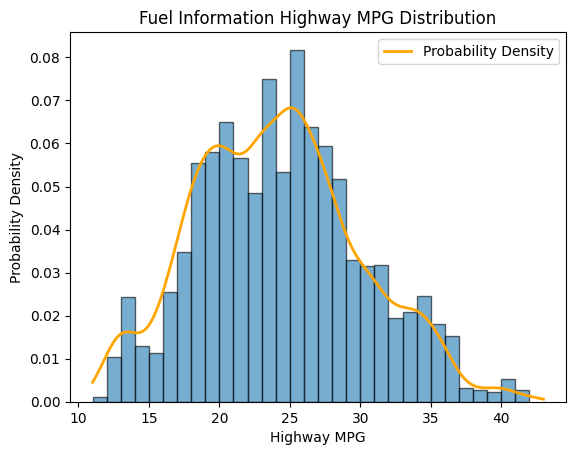

[None, None]

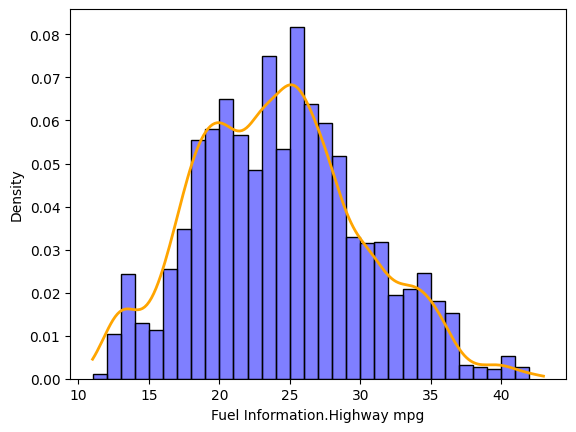

In [23]:
# YOUR CODE HERE
# plt.hist(data,bins,edgecolor)
# for density plot use scipy
from scipy.stats import gaussian_kde

# Filter out the unrealistic outlier
data = cars_df[cars_df["Fuel Information.Highway mpg"] < 100]["Fuel Information.Highway mpg"]

# Create bins that cover the full range of the data
bins=range(int(data.min()),int(data.max()),1)

# plot the histogram
plt.hist(
    data,
    edgecolor='black',
    bins = bins,
    alpha = 0.6,
    density=True
)
# Create the density estimate
density = gaussian_kde(data)
x_vals = np.linspace(data.min(), data.max(), 200)
plt.plot(x_vals, density(x_vals), color='orange', linewidth=2, label='Probability Density')

# Labels and title
plt.title("Fuel Information Highway MPG Distribution")
plt.xlabel("Highway MPG")
plt.ylabel("Probability Density")
plt.legend()
plt.show()

# Or the easier way with seaborn
import seaborn as sns
bins = range(int(data.min()),int(data.max()),1)
sns.histplot(data,bins=bins,color='blue',edgecolor='black',kde=True, stat='density')
plt.setp(plt.gca().lines, color='orange', linewidth=2)

b) Repeate the same for city fuel economy(`Fuel Information.City mpg`) - 0.5 point

(Subjective)(Optional) Is this plot similar to the previous one? Approximately, how much is city fuel economy lower compared to highway fuel economy?

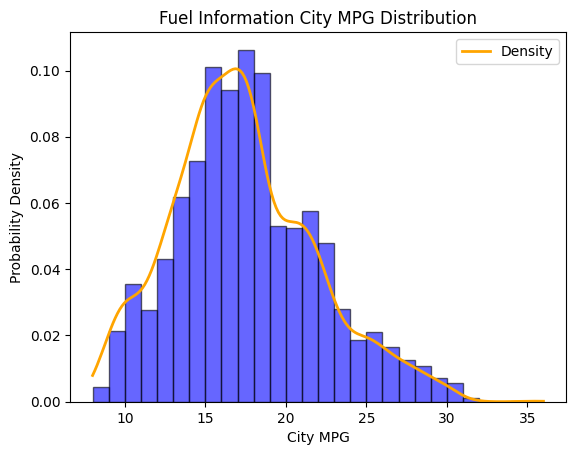

In [21]:
# YOUR CODE HERE
# create a dataframe excluding the data that is flawed
data = cars_df[cars_df['Fuel Information.City mpg']< cars_df["Fuel Information.Highway mpg"]]['Fuel Information.City mpg']
bin = range(int(data.min()),int(data.max()),1)

plt.hist(data, bins=bin, color='blue',edgecolor='black', alpha=0.6, density=True)

# Create the density estimate
density = gaussian_kde(data)
x_vals = np.linspace(data.min(), data.max(), 200)
plt.plot(x_vals, density(x_vals), color='orange', linewidth=2, label='Density')

# Labels and title
plt.title("Fuel Information City MPG Distribution")
plt.xlabel("City MPG")
plt.ylabel("Probability Density")
plt.legend()
plt.show()

c) Repeat the same for Engine Horsepower(`Engine Information.Engine Statistics.Horsepower`) - 0.5 points

Note:

1. Use appropriate `bins`, since the range of horsepower is much higher than fuel economy. Hint - Try bin size of `10` or `20`
2. Experiment with different colors from 1 (a)


In [ ]:
# YOUR CODE HERE

### 3. Correlation - 3 points

3.1 Plot a scatter plot, overlayed with a *line of best fit* plot, of engine horsepower vs highway fuel economy - 2 point

* The x-axis is engine power
* The y-axis is fuel economy
* Lable the axes appropriately
* Add an appropriate title
* Use [`np.polyfit`](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) or any other method/library to plot the line of best fit

* Hint - The resulting plot should look similar to [this](https://en.wikipedia.org/wiki/Simple_linear_regression#/media/File:Okuns_law_quarterly_differences.svg)

Reference  -[`Simple linear regression`](https://en.wikipedia.org/wiki/Simple_linear_regression)

You do not have to worry about the details of linear regression here. You can use any library function to do it for you

In [ ]:
# YOUR CODE HERE


3.2 You might notice in the previous plot that there is an outlier(porbably an error) in fuel economy. Repate the plot after removing the outlier point - 0.5 points

(Optional)(Subjective) What can you tell about the correlation between engine horsepower and fuel economy?

In [ ]:
# YOUR CODE HERE



3.3 Repeat the same for engine horsepower(x-axis) and engine torque(y-axis) - 0.5 point

Optional)(Subjective) What can you tell about the correlation between engine horsepower and engine torque?

In [ ]:
# YOUR CODE HERE

### 4. Subplots - 3 points

* Create a 2 x 2 subplots of the following plots. Make sure the entire plot is sufficiently large(Hint - check [`rcParams`](https://matplotlib.org/stable/tutorials/introductory/customizing.html) )
    * Box plot of highway fuel economiy(Note the extreme outlier. You may optionally remove it before plotting it. Both are acceptable solutions) - 0.5 points
    * Pie chart of Model year(`Identification.Year`) - 0.5 points
    * Histogram of Length(`Dimensions.Length`) with appropriate bins - 0.5 points
    * Scatter-plot of Length vs Width(`Dimensions.Width`) with marker size representing engine horsepower - 0.5 point
* Subplot and appropriate labelling - 1 point
* The order of the plots does not matter

In [ ]:
# YOUR CODE HERE


### 5. Heatmap - 3 points

* Create a heatmap of "Make of the car" vs "year+transmission type" for "number of models for that year"
    * Pick the top 8 car manufactutres (`Identification.Make`) by number of cars produced - x-axis
    * Use a combination of model year and transmission type on y-axis.
        * All entries with Automatic transmission should be renamed to "AT" and manual to "MT"
        * Each entry on the Y-axis should look like "2009-AT" representing the model year 2009 and Automatic transmission type
        * This will require some pre-processing with pandas before plotting the heatmap
    * Create a heatmap where each data point shows the number of such models created
    * The heatmap should be of size 8x8, with top 8 manufactutres on x-axis and 8 combinations(4 years and 2 transmission types) of year-transmission on y-axis

In [ ]:
# YOUR CODE HERE

### 6. Pair-plots (Seaborn) - 2 points
* Create a pair-plot of the following columns: length, width, highway fuel economy, city fuel economy, engine power, engine torque
* Which of the pairs show a positive correlation? Which of the pairs show a negative correlation?

In [ ]:
# YOUR CODE HERE